<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/Ranosz_testowy/26_03_pum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
from numpy import mean
from numpy import std
from numpy import absolute

from matplotlib import pyplot

from sklearn.datasets import fetch_california_housing

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error

In [45]:
# load data
housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)
print(housing.feature_names)
X = pd.DataFrame(data = housing.data, columns = housing.feature_names)
print(X.head())
y = housing.target

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [46]:
from sklearn.metrics import get_scorer_names
all_scorers = get_scorer_names()
type(all_scorers)
print(all_scorers)

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weight

In [47]:
# Przećwicz
# Zbuduj regresję szacującą wysokość wypłaty w wersjach:
# Regresja wielomianowa stopnia 2
# Regresja wielomianowa stopnia 2
# Regresja z wykorzystanie k-NN
# Wykorzystaj walidacje krzyżową typu RepeatedKFold
# Porównaj wyniki na wykresie
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=1)
reg = LinearRegression()
scores_nl = cross_val_score(reg, X, y, scoring='neg_mean_absolute_error', cv=cv)
# scores_nl = cross_val_score(reg, X, y, cv=cv)
print(scores_nl)


[-0.53286851 -0.52878709 -0.53770585 -0.52744413 -0.5316177  -0.51838361
 -0.54599058 -0.54441511 -0.52572175 -0.52433106 -0.53594667 -0.5264349
 -0.52975192 -0.53645394 -0.52883193 -0.52756796 -0.53376565 -0.54080917
 -0.52410467 -0.5328948  -0.53331152 -0.54714239 -0.52155503 -0.53514727
 -0.53577333]


In [48]:
poly = PolynomialFeatures(degree=2)
poly_2_X = poly.fit_transform(X)
scores_nl_poly_2 = cross_val_score(reg, poly_2_X, y, scoring='neg_mean_absolute_error', cv=cv)
# scores_nl_poly_2 = cross_val_score(reg, poly_2_X, y, cv=cv)
print(scores_nl_poly_2)

[-0.46068688 -0.46520339 -0.48962711 -0.53463121 -0.46972893 -0.45852361
 -0.5073441  -0.55725589 -0.45461183 -0.45874716 -0.48855883 -0.46910137
 -0.46268312 -0.4657843  -0.53521965 -0.46827252 -0.65348789 -0.48126515
 -0.45291146 -0.47421852 -0.46808185 -0.73837247 -0.46453799 -0.47494396
 -0.46972059]


In [49]:
poly = PolynomialFeatures(degree=3)
poly_3_X = poly.fit_transform(X)
scores_nl_poly_3 = cross_val_score(reg, poly_3_X, y, scoring='neg_mean_absolute_error', cv=cv)
# scores_nl_poly_3 = cross_val_score(reg, poly_3_X, y, cv=cv)
print(scores_nl_poly_3)

[ -0.44583649  -0.43418764  -3.13814801  -2.68079974  -0.45236965
  -0.46898174  -9.76736783 -11.46457604  -0.44884403  -0.42936489
 -10.06621983  -0.56477951  -0.57872008  -0.44306017  -5.64384053
  -0.55661588 -33.28861067  -0.51706274  -0.42191951  -1.88780113
  -0.44427609 -69.86595766  -0.61333829  -0.48673074  -0.52367037]


In [50]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
scores_knn = cross_val_score(neigh, X, y, scoring='neg_mean_absolute_error', cv=cv)
# scores_knn = cross_val_score(neigh, X, y, cv=cv)

<ipython-input-51-8f1ed3863bd9>:2: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  pyplot.ylim(-1, 0,5)


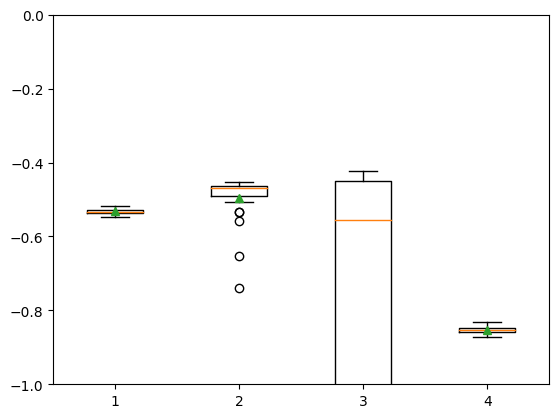

In [51]:
pyplot.boxplot([scores_nl,scores_nl_poly_2,scores_nl_poly_3, scores_knn], showmeans=True)
pyplot.ylim(-1, 0,5)
pyplot.show()
# widac overfitting na regresji wielomianowej 3 stopnia

[-0.53286851 -0.52878709 -0.53770585 -0.52744413 -0.5316177  -0.51838361
 -0.54599058 -0.54441511 -0.52572175 -0.52433106 -0.53594667 -0.5264349
 -0.52975192 -0.53645394 -0.52883193 -0.52756796 -0.53376565 -0.54080917
 -0.52410467 -0.5328948  -0.53331152 -0.54714239 -0.52155503 -0.53514727
 -0.53577333]
Mean MAE: -0.532


<ipython-input-52-e18f35ec82e3>:14: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  pyplot.ylim(-1, 0,5)


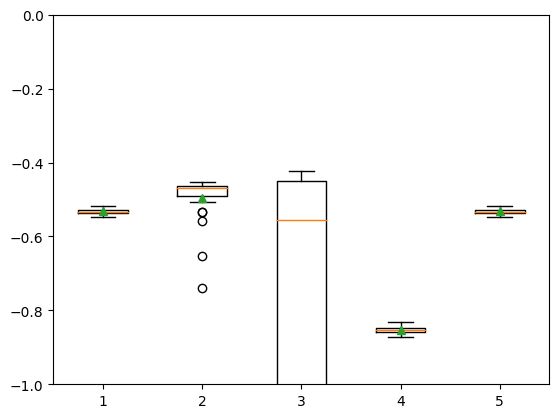

In [52]:
# prepare the model without scaling
model = TransformedTargetRegressor(regressor=LinearRegression())
# evaluate the model
scores_tv = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv)
# convert scores to positive
# scores = absolute(scores_tv) - niepotrzebne bo mamy ujemne
# summarize the result
s_mean = mean(scores_tv)
print(scores_tv)
print('Mean MAE: %.3f' % (s_mean))

# plot the results
pyplot.boxplot([scores_nl,scores_nl_poly_2,scores_nl_poly_3, scores_knn, scores_tv], showmeans=True)
pyplot.ylim(-1, 0,5)
pyplot.show()